In [2]:
import numpy as np
import matplotlib.pyplot as plt


## PATTERN

In [13]:
# Input the name of the alternatives
alternatives = ["A", "B", "C"]

# Input the name of the criteria
criteria = ["C1", "C2", "C3", "C4"]

# Set dimensions
n_alternatives = len(alternatives)
n_criteria = len(criteria)


In [14]:
# Set the weights
weights = [0.2, 0.4, 0.1, 0.3]  # Should be all positive


In [17]:
# Set the matrix
matrix = np.array(
    [[6, 2, 4, 1 / 4], [3, 3, 3, 1 / 4], [1, 5, 3, 1 / 2]]  # Should be all positive
)


In [18]:
# Step 1: Check if the weights sum up to 1
if np.sum(weights) - 1 < 1e-10:
    print("The weights are summing 1, let's continue!")
else:
    # Normalize the weights
    weights = weights / np.sum(weights)
    print("The weights have been normalized to sum 1, let's continue!")


The weights are summing 1, let's continue!


In [19]:
# Step 2: Check if the matrix is normalized, i.e. the values are between 0 and 1 and each column sums up to 1

for i in range(n_criteria):
    # Normalize the column
    if np.sum(matrix[:, i]) - 1 < 1e-10:
        print("The column {} is already normalized, let's continue!".format(i))
    else:
        matrix[:, i] = matrix[:, i] / np.sum(matrix[:, i])
        print("The column {} has been normalized to sum 1, let's continue!".format(i))


The column 0 has been normalized to sum 1, let's continue!
The column 1 has been normalized to sum 1, let's continue!
The column 2 has been normalized to sum 1, let's continue!
The column 3 is already normalized, let's continue!


In [20]:
# Step 3: Calculate the weighted sum of each alternative, i.e. the pertinence index of each alternative

# Initialize the pertinence index vector
pertinence_index = np.zeros(n_alternatives)

for i in range(n_alternatives):
    for j in range(n_criteria):
        pertinence_index[i] += weights[j] * matrix[i, j]

print("The pertinence index of each alternative is: {}".format(pertinence_index))


The pertinence index of each alternative is: [0.315 0.285 0.4  ]


In [24]:
# Multiply the matrix by the weights

weighted_matrix = np.zeros((n_alternatives, n_criteria))

for i in range(n_alternatives):
    for j in range(n_criteria):
        weighted_matrix[i, j] = matrix[i, j] * weights[j]


In [22]:
# Step 4: Calculate the ranking of the alternatives

# Sort the alternatives by their pertinence index
ranking = np.argsort(pertinence_index)[::-1]
ranking_named = [alternatives[i] for i in ranking]

print("The ranking of the alternatives is: {}".format(ranking))
print("The ranking of the alternatives is: {}".format(ranking_named))


The ranking of the alternatives is: [2 0 1]
The ranking of the alternatives is: ['C', 'A', 'B']


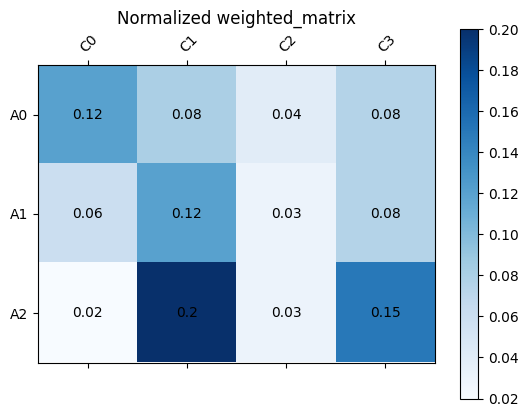

In [47]:
# Step 5: Plot visualization of the matrix

# Set the labels
labels = ["A{}".format(i) for i in range(n_alternatives)]
criteria = ["C{}".format(i) for i in range(n_criteria)]

# Set the colors
colors = plt.cm.Blues(np.linspace(0, 0.5, n_alternatives))

# Plot the matrix
fig, ax = plt.subplots()
cax = ax.matshow(weighted_matrix, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Set the ticks
ax.set_xticks(np.arange(n_criteria))
ax.set_yticks(np.arange(n_alternatives))
ax.set_xticklabels(criteria)
ax.set_yticklabels(labels)

# Rotate the labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="left", rotation_mode="anchor")

# Set the title
ax.set_title("Normalized weighted_matrix")

# Set the values
for i in range(n_alternatives):
    for j in range(n_criteria):
        text = ax.text(
            j,
            i,
            round(weighted_matrix[i, j], 2),
            ha="center",
            va="center",
            color="black",
        )

# Show the plot
plt.show()


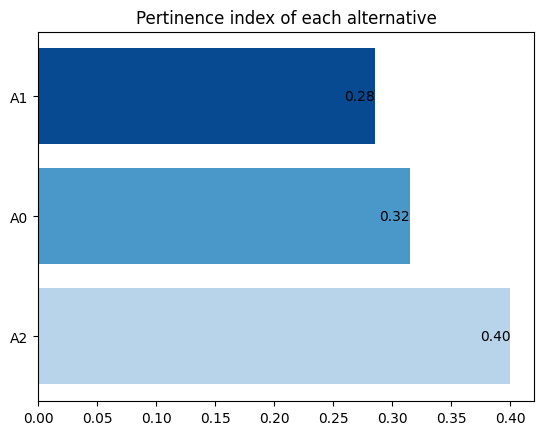

In [53]:
# Step 6: Plot visualization of the ranking

# Set the colors
colors = plt.cm.Blues(np.linspace(0.3, 0.9, n_alternatives))

# Sort the labels and the pertinence index
labels = [labels[i] for i in ranking]
pertinence_index = [pertinence_index[i] for i in ranking]

# Plot the ranking
fig, ax = plt.subplots()
ax.barh(labels, pertinence_index, color=colors)

# Set the title
ax.set_title("Pertinence index of each alternative")

# Set the values
for i, v in enumerate(pertinence_index):
    ax.text(v, i, "{:.2f}".format(v), va="center", color="black", ha="right")

# Show the plot
plt.show()


## ELECTRE

In [60]:
matrix


array([[0.6 , 0.2 , 0.4 , 0.25],
       [0.3 , 0.3 , 0.3 , 0.25],
       [0.1 , 0.5 , 0.3 , 0.5 ]])

In [61]:
weights


[0.2, 0.4, 0.1, 0.3]

In [86]:
# Define the hats values
max_discordance = 0.4
min_concordance = 0.6

# calculate the concordance matrix

# Initialize the concordance matrix
concordance_matrix = np.zeros((n_alternatives, n_alternatives))

for i in range(n_alternatives):  # definitely not right, don't believe it will work
    for j in range(n_alternatives):
        if i == j:
            concordance_matrix[i, j] = 0
        else:
            for c in range(n_criteria):
                if abs(matrix[i, c] - matrix[j, c]) < 1e-10:
                    # draw
                    concordance_matrix[i, j] += 0.5 * weights[c]
                elif matrix[i, c] > matrix[j, c]:
                    concordance_matrix[i, j] += weights[c]

# calculate the discordance matrix

# Initialize the discordance matrix
discordance_matrix = np.zeros((n_alternatives, n_alternatives))

# Calculate the max amplitud
amplitudes = np.zeros(n_criteria)
for c in range(n_criteria):
    amplitudes[c] = np.max(matrix[:, c]) - np.min(matrix[:, c])
max_amplitud = np.max(amplitudes)

for i in range(n_alternatives):
    for j in range(n_alternatives):
        if i == j:
            discordance_matrix[i, j] = 0
        else:
            vector = []
            for c in range(n_criteria):
                vector.append((matrix[j, c] - matrix[i, c]) / max_amplitud)
            discordance_matrix[i, j] = np.max([0, max(vector)])


In [85]:
concordance_matrix


array([[0.  , 0.45, 0.3 ],
       [0.55, 0.  , 0.25],
       [0.7 , 0.75, 0.  ]])

In [84]:
discordance_matrix


array([[0. , 0.2, 0.6],
       [0.6, 0. , 0.5],
       [1. , 0.4, 0. ]])

In [93]:
# Calculate the dominance concordance matrix

dom_concordance_matrix = np.zeros((n_alternatives, n_alternatives))

for i in range(n_alternatives):
    for j in range(n_alternatives):
        if i == j:
            dom_concordance_matrix[i, j] = 0
        else:
            if concordance_matrix[i, j] >= min_concordance:
                dom_concordance_matrix[i, j] = 1
            else:
                dom_concordance_matrix[i, j] = 0

# Calculate the dominance discordance matrix

dom_discordance_matrix = np.zeros((n_alternatives, n_alternatives))

for i in range(n_alternatives):
    for j in range(n_alternatives):
        if i == j:
            dom_discordance_matrix[i, j] = 0
        else:
            if discordance_matrix[i, j] <= max_discordance:
                dom_discordance_matrix[i, j] = 1
            else:
                dom_discordance_matrix[i, j] = 0

# Calculate the aggregated dominance matrix

aggregated_dom_matrix = np.zeros((n_alternatives, n_alternatives))

for i in range(n_alternatives):
    for j in range(n_alternatives):
        aggregated_dom_matrix[i, j] = (
            dom_concordance_matrix[i, j] * dom_discordance_matrix[i, j]
        )


In [95]:
dom_concordance_matrix, dom_discordance_matrix, aggregated_dom_matrix


(array([[0., 0., 0.],
        [0., 0., 0.],
        [1., 1., 0.]]),
 array([[0., 1., 0.],
        [0., 0., 0.],
        [0., 1., 0.]]),
 array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 1., 0.]]))

In [96]:
# Calculate the core of the aggregated dominance matrix

# Initialize the core


# Plot the graph of the core


Ranking:  [2 1 0]
Pertinence index:  [0. 0. 0.]
Labels:  ['A1', 'A0', 'A2']
